In [33]:
import pandas as pd
import numpy as np

In [34]:
data = pd.read_csv('./data/houses_to_rent_v2.csv')

In [35]:
data.head()

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211,42,5618
1,São Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750,63,7973
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41,3841
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17,1421
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25,11,836


In [36]:
data.shape

(10692, 13)

In [37]:
# Calcula la cantidad de valores nulos en cada columna
data.isnull().sum()

city                   0
area                   0
rooms                  0
bathroom               0
parking spaces         0
floor                  0
animal                 0
furniture              0
hoa (R$)               0
rent amount (R$)       0
property tax (R$)      0
fire insurance (R$)    0
total (R$)             0
dtype: int64

In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10692 entries, 0 to 10691
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   city                 10692 non-null  object
 1   area                 10692 non-null  int64 
 2   rooms                10692 non-null  int64 
 3   bathroom             10692 non-null  int64 
 4   parking spaces       10692 non-null  int64 
 5   floor                10692 non-null  object
 6   animal               10692 non-null  object
 7   furniture            10692 non-null  object
 8   hoa (R$)             10692 non-null  int64 
 9   rent amount (R$)     10692 non-null  int64 
 10  property tax (R$)    10692 non-null  int64 
 11  fire insurance (R$)  10692 non-null  int64 
 12  total (R$)           10692 non-null  int64 
dtypes: int64(9), object(4)
memory usage: 1.1+ MB


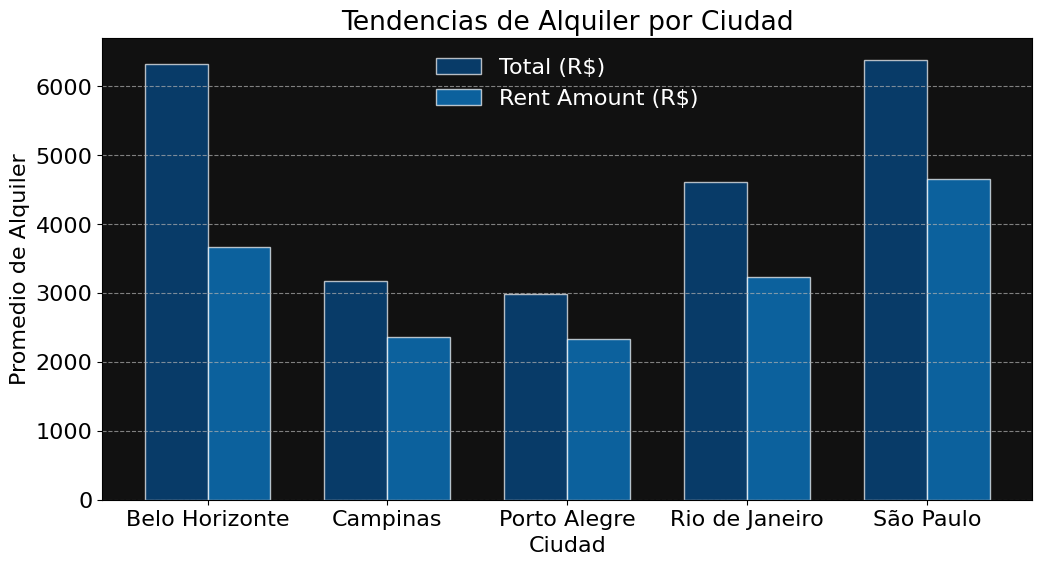

In [39]:
import matplotlib.pyplot as plt

# Configurar el tamaño de fuente predeterminado
plt.rcParams.update({'font.size': 16})

# Agrupar por ciudad y calcular el promedio del rent amount y total
rent_trends = data.groupby('city')[['total (R$)', 'rent amount (R$)']].mean().reset_index()

# Establecer el ancho de las barras
bar_width = 0.35

# Crear índices para las posiciones de las barras
indices = range(len(rent_trends))

# Colores personalizados
colors = ['#054e8e', '#0a84d9']

# Generar la gráfica de barras por pares con personalizaciones
plt.figure(figsize=(12, 6))
plt.bar(indices, rent_trends['total (R$)'], bar_width, label='Total (R$)', color=colors[0], edgecolor='white', alpha=0.7)
plt.bar([i + bar_width for i in indices], rent_trends['rent amount (R$)'], bar_width, label='Rent Amount (R$)', color=colors[1], edgecolor='white', alpha=0.7)
plt.xlabel('Ciudad')
plt.ylabel('Promedio de Alquiler')
plt.title('Tendencias de Alquiler por Ciudad')

# Configurar etiquetas en el eje x
plt.xticks([i + bar_width / 2 for i in indices], rent_trends['city'], rotation=0, horizontalalignment='center')  # Etiquetas en posición horizontal

# Configurar el color del texto de la leyenda
plt.legend(loc='upper center', frameon=False, labelcolor='white')

plt.grid(axis='y', linestyle='--', alpha=0.7)  # Agregar líneas de cuadrícula

# Personalización de fondo
plt.gca().set_facecolor('#111')



# Guardar la gráfica como un archivo SVG
plt.savefig('../FrontEnd/src/assets/tendencias_alquiler.png', format='png')


In [40]:
data.columns

Index(['city', 'area', 'rooms', 'bathroom', 'parking spaces', 'floor',
       'animal', 'furniture', 'hoa (R$)', 'rent amount (R$)',
       'property tax (R$)', 'fire insurance (R$)', 'total (R$)'],
      dtype='object')

In [41]:
# Variables categóricas de interés
variables_categoricas = ['city', 'animal', 'furniture']

# Itera a través de las variables categóricas y muestra las clases únicas
for variable in variables_categoricas:
    clases_unicas = data[variable].unique()
    print(f'Clases únicas en la variable "{variable}":')
    for clase in clases_unicas:
        print(clase)
    print()

Clases únicas en la variable "city":
São Paulo
Porto Alegre
Rio de Janeiro
Campinas
Belo Horizonte

Clases únicas en la variable "animal":
acept
not acept

Clases únicas en la variable "furniture":
furnished
not furnished



In [42]:
data['floor'].unique()

array(['7', '20', '6', '2', '1', '-', '4', '3', '10', '11', '24', '9',
       '8', '17', '18', '5', '13', '15', '16', '14', '26', '12', '21',
       '19', '22', '27', '23', '35', '25', '46', '28', '29', '301', '51',
       '32'], dtype=object)

In [43]:
# Convierte los números en 'floor' a enteros y reemplaza '-' por 0
data['floor'] = data['floor'].apply(lambda x: int(x) if x.isnumeric() else 1)
data

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211,42,5618
1,São Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750,63,7973
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41,3841
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17,1421
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25,11,836
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10687,Porto Alegre,63,2,1,1,5,not acept,furnished,402,1478,24,22,1926
10688,São Paulo,285,4,4,4,17,acept,not furnished,3100,15000,973,191,19260
10689,Rio de Janeiro,70,3,3,0,8,not acept,furnished,980,6000,332,78,7390
10690,Rio de Janeiro,120,2,2,2,8,acept,furnished,1585,12000,279,155,14020


C:\Users\crist\AppData\Local\Temp\ipykernel_4904\2111874789.py:5: FutureWarning: The default value of numeric_only in DataFrame.corrwith is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  'property tax (R$)', 'fire insurance (R$)']).corrwith(data['total (R$)'])


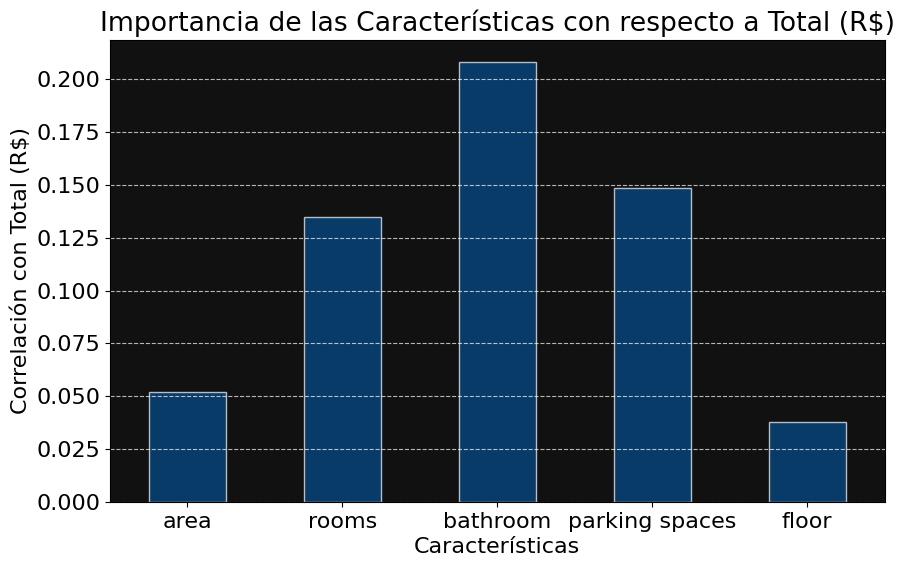

In [44]:
import matplotlib.pyplot as plt

# Calcular la correlación entre todas las características y 'total (R$)'
correlations = data.drop(columns=['total (R$)','hoa (R$)', 'rent amount (R$)',
       'property tax (R$)', 'fire insurance (R$)']).corrwith(data['total (R$)'])

# Colores personalizados
colors = ['#054e8e']

# Generar la gráfica de barras con el estilo personalizado
plt.figure(figsize=(10, 6))
correlations.plot(kind='bar', color=colors[0], edgecolor='white', alpha=0.7)
plt.xlabel('Características')
plt.ylabel('Correlación con Total (R$)')
plt.title('Importancia de las Características con respecto a Total (R$)')
plt.grid(axis='y', linestyle='--', alpha=0.7, color='white')
plt.xticks(rotation=0, ha='center')

# Cambiar el color del fondo
plt.gca().set_facecolor('#111')


# Guardar la gráfica como un archivo SVG
plt.savefig('../FrontEnd/src/assets/correlacion_total.png', format='png')


In [45]:
Q1 = data['total (R$)'].quantile(0.25)
Q3 = data['total (R$)'].quantile(0.75)
IQR = Q3 - Q1

# Definir el umbral para identificar valores atípicos
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Eliminar valores atípicos
data = data[(data['total (R$)'] >= lower_bound) & (data['total (R$)'] <= upper_bound)]
data.shape

(9986, 13)

In [46]:
# Define un diccionario de mapeo para las categorías 'animal' y 'furniture'
mapeo = {
    'acept': 1,
    'not acept': 0,
    'furnished': 1,
    'not furnished': 0,
    'São Paulo':0,
    'Porto Alegre':1,
    'Rio de Janeiro':2,
    'Campinas':3,
    'Belo Horizonte':4
}

data = pd.get_dummies(data, columns=['animal'])
data = pd.get_dummies(data, columns=['furniture'])
data = pd.get_dummies(data, columns=['city'])

In [47]:
data.describe()

,area,rooms,bathroom,parking spaces,floor,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$),animal_acept,animal_not acept,furniture_furnished,furniture_not furnished,city_Belo Horizonte,city_Campinas,city_Porto Alegre,city_Rio de Janeiro,city_São Paulo
count,9986.000000,9986.000000,9986.000000,9986.000000,9986.000000,9986.000000,9986.000000,9986.000000,9986.000000,9986.000000,9986.000000,9986.000000,9986.000000,9986.000000,9986.000000,9986.000000,9986.000000,9986.000000,9986.000000
mean,131.632886,2.416984,2.086521,1.463048,5.170639,781.852594,3263.652814,249.636191,44.745844,4340.064791,0.775185,0.224815,0.236531,0.763469,0.118666,0.084318,0.117965,0.144402,0.534649
std,492.747146,1.130170,1.282416,1.468851,5.811642,861.013369,2399.668435,388.469128,34.239568,3078.240405,0.417481,0.417481,0.424973,0.424973,0.323411,0.277878,0.322583,0.351515,0.498823
min,11.000000,1.000000,1.000000,0.000000,1.000000,0.000000,450.000000,0.000000,3.000000,499.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,55.000000,2.000000,1.000000,0.000000,1.000000,160.000000,1500.000000,34.000000,20.000000,1990.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,85.000000,2.000000,2.000000,1.000000,3.000000,530.000000,2500.000000,110.000000,33.000000,3330.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,160.000000,3.000000,3.000000,2.000000,8.000000,1100.000000,4250.000000,300.000000,58.000000,5845.750000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,46335.000000,10.000000,10.000000,12.000000,301.000000,8000.000000,13500.000000,5404.000000,214.000000,13820.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [48]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9986 entries, 0 to 10691
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   area                     9986 non-null   int64
 1   rooms                    9986 non-null   int64
 2   bathroom                 9986 non-null   int64
 3   parking spaces           9986 non-null   int64
 4   floor                    9986 non-null   int64
 5   hoa (R$)                 9986 non-null   int64
 6   rent amount (R$)         9986 non-null   int64
 7   property tax (R$)        9986 non-null   int64
 8   fire insurance (R$)      9986 non-null   int64
 9   total (R$)               9986 non-null   int64
 10  animal_acept             9986 non-null   uint8
 11  animal_not acept         9986 non-null   uint8
 12  furniture_furnished      9986 non-null   uint8
 13  furniture_not furnished  9986 non-null   uint8
 14  city_Belo Horizonte      9986 non-null   uint8
 15  cit

In [49]:
import numpy as np
import pandas as pd

# Calcular el IQR
Q1 = data['hoa (R$)'].quantile(0.25)
Q3 = data['hoa (R$)'].quantile(0.75)
IQR = Q3 - Q1

# Identificar valores atípicos
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = data[(data['hoa (R$)'] < lower_bound) | (data['hoa (R$)'] > upper_bound)]

In [50]:
import numpy as np
import pandas as pd

# Calcular el IQR
Q1 = data['rent amount (R$)'].quantile(0.25)
Q3 = data['rent amount (R$)'].quantile(0.75)
IQR = Q3 - Q1

# Identificar valores atípicos
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = data[(data['rent amount (R$)'] < lower_bound) | (data['rent amount (R$)'] > upper_bound)]

In [51]:
import numpy as np
import pandas as pd

# Calcular el IQR
Q1 = data['property tax (R$)'].quantile(0.25)
Q3 = data['property tax (R$)'].quantile(0.75)
IQR = Q3 - Q1

# Identificar valores atípicos
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = data[(data['property tax (R$)'] < lower_bound) | (data['property tax (R$)'] > upper_bound)]

In [52]:
import numpy as np
import pandas as pd

# Calcular el IQR
Q1 = data['fire insurance (R$)'].quantile(0.25)
Q3 = data['fire insurance (R$)'].quantile(0.75)
IQR = Q3 - Q1

# Identificar valores atípicos
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = data[(data['fire insurance (R$)'] < lower_bound) | (data['fire insurance (R$)'] > upper_bound)]

In [53]:
import numpy as np
import pandas as pd

# Calcular el IQR
Q1 = data['total (R$)'].quantile(0.25)
Q3 = data['total (R$)'].quantile(0.75)
IQR = Q3 - Q1

# Identificar valores atípicos
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = data[(data['total (R$)'] < lower_bound) | (data['total (R$)'] > upper_bound)]

In [54]:
# Eliminar registros con valores atípicos en 'hoa (R$)'
data = data[~((data['hoa (R$)'] < lower_bound) | (data['hoa (R$)'] > upper_bound))]
# Eliminar registros con valores atípicos en 'rent amount (R$)'
data = data[~((data['rent amount (R$)'] < lower_bound) | (data['rent amount (R$)'] > upper_bound))]
# Eliminar registros con valores atípicos en 'property tax (R$)'
data = data[~((data['property tax (R$)'] < lower_bound) | (data['property tax (R$)'] > upper_bound))]
# Eliminar registros con valores atípicos en 'fire insurance (R$)'
data = data[~((data['fire insurance (R$)'] < lower_bound) | (data['fire insurance (R$)'] > upper_bound))]
# Eliminar registros con valores atípicos en 'total (R$)'
data = data[~((data['total (R$)'] < lower_bound) | (data['total (R$)'] > upper_bound))]


In [55]:
data.describe()

,area,rooms,bathroom,parking spaces,floor,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$),animal_acept,animal_not acept,furniture_furnished,furniture_not furnished,city_Belo Horizonte,city_Campinas,city_Porto Alegre,city_Rio de Janeiro,city_São Paulo
count,9618.000000,9618.000000,9618.000000,9618.000000,9618.000000,9618.000000,9618.000000,9618.000000,9618.000000,9618.000000,9618.000000,9618.000000,9618.000000,9618.000000,9618.000000,9618.000000,9618.000000,9618.000000,9618.000000
mean,125.676544,2.371491,2.013412,1.401747,5.114681,730.192556,3028.353296,221.414015,41.574860,4021.695467,0.773030,0.226970,0.230609,0.769391,0.120295,0.086193,0.121439,0.145768,0.526305
std,500.165578,1.107776,1.224141,1.424530,5.781942,773.515270,2080.749581,331.367598,29.968138,2659.496014,0.418895,0.418895,0.421245,0.421245,0.325323,0.280663,0.326654,0.352892,0.499334
min,11.000000,1.000000,1.000000,0.000000,1.000000,0.000000,450.000000,0.000000,3.000000,499.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,54.000000,1.000000,1.000000,0.000000,1.000000,160.000000,1466.250000,30.000000,20.000000,1951.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,80.000000,2.000000,2.000000,1.000000,3.000000,505.000000,2400.000000,100.000000,32.000000,3208.500000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,150.000000,3.000000,3.000000,2.000000,8.000000,1000.000000,4000.000000,275.000000,54.000000,5394.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,46335.000000,10.000000,10.000000,10.000000,301.000000,6500.000000,11000.000000,4710.000000,187.000000,11610.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [56]:
data

,area,rooms,bathroom,parking spaces,floor,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$),animal_acept,animal_not acept,furniture_furnished,furniture_not furnished,city_Belo Horizonte,city_Campinas,city_Porto Alegre,city_Rio de Janeiro,city_São Paulo
0,70,2,1,1,7,2065,3300,211,42,5618,1,0,1,0,0,0,0,0,1
1,320,4,4,0,20,1200,4960,1750,63,7973,1,0,0,1,0,0,0,0,1
2,80,1,1,1,6,1000,2800,0,41,3841,1,0,0,1,0,0,1,0,0
3,51,2,1,0,2,270,1112,22,17,1421,1,0,0,1,0,0,1,0,0
4,25,1,1,0,1,0,800,25,11,836,0,1,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10684,98,2,1,0,1,560,3900,184,51,4695,1,0,0,1,0,0,0,1,0
10685,83,3,2,2,11,888,7521,221,96,8726,1,0,0,1,0,0,0,0,1
10687,63,2,1,1,5,402,1478,24,22,1926,0,1,1,0,0,0,1,0,0
10689,70,3,3,0,8,980,6000,332,78,7390,0,1,1,0,0,0,0,1,0


In [57]:
data.columns

Index(['area', 'rooms', 'bathroom', 'parking spaces', 'floor', 'hoa (R$)',
       'rent amount (R$)', 'property tax (R$)', 'fire insurance (R$)',
       'total (R$)', 'animal_acept', 'animal_not acept', 'furniture_furnished',
       'furniture_not furnished', 'city_Belo Horizonte', 'city_Campinas',
       'city_Porto Alegre', 'city_Rio de Janeiro', 'city_São Paulo'],
      dtype='object')

In [58]:
import pandas as pd


# Dividir el dataset en características (X) y etiquetas (y)
X = data.drop(["hoa (R$)", "rent amount (R$)", "property tax (R$)", "fire insurance (R$)", "total (R$)"], axis=1)
y = data[["hoa (R$)", "rent amount (R$)", "property tax (R$)", "fire insurance (R$)", "total (R$)"]]

In [59]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [60]:
from sklearn.linear_model import LinearRegression

# Crear el modelo de regresión lineal
model = LinearRegression()

# Ajustar el modelo a los datos de entrenamiento
model.fit(X_train, y_train)


LinearRegression()

In [61]:
from sklearn.metrics import mean_squared_error, r2_score

# Realizar predicciones en los datos de prueba
y_pred = model.predict(X_test)

# Calcular el error cuadrático medio
mse = mean_squared_error(y_test, y_pred)

# Calcular el coeficiente de determinación (R2)
r2 = r2_score(y_test, y_pred)

print(f"Error cuadrático medio: {mse}")
print(f"Coeficiente de determinación (R2): {r2}")


Error cuadrático medio: 1158981.2857160158
Coeficiente de determinación (R2): 0.4506907001797959


### Preparacion de datos para el modelo 

In [62]:
# Selección de características y variable objetivo
X = data[['area', 'rooms', 'bathroom', 'parking spaces', 'floor', 'animal_acept', 'animal_not acept', 'furniture_furnished',
       'furniture_not furnished', 'city_Belo Horizonte', 'city_Campinas','city_Porto Alegre', 'city_Rio de Janeiro', 'city_São Paulo']]
y = data['rent amount (R$)']


In [63]:
from sklearn.model_selection import train_test_split

# División de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Regresion Lineal Multiple

In [64]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

# Definir el modelo de regresión lineal
model_hoa = LinearRegression()

# Definir el espacio de búsqueda de hiperparámetros
param_grid = {
    'fit_intercept': [True, False],
    'positive': [True, False],
    # Puedes agregar más hiperparámetros aquí
}

# Realizar la búsqueda de hiperparámetros
grid_search = GridSearchCV(model_hoa, param_grid, cv=3, scoring='neg_mean_squared_error', verbose=2, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Obtener el mejor modelo con los mejores hiperparámetros
best_model_hoa = grid_search.best_estimator_

# Realizar predicciones en el conjunto de prueba con el mejor modelo
predictions_hoa = best_model_hoa.predict(X_test)

# Calcular métricas de evaluación con el mejor modelo
mse = mean_squared_error(y_test, predictions_hoa)
r2 = r2_score(y_test, predictions_hoa)

# Imprimir métricas de evaluación
print(f"Mean Squared Error (MSE): {mse}")
print(f"Coeficiente de Determinación (R^2): {r2}")
# Obtener los mejores hiperparámetros
print("\nMejores hiperparámetros encontrados:", grid_search.best_params_)

Fitting 3 folds for each of 4 candidates, totalling 12 fits


Mean Squared Error (MSE): 2242014.2213145606
Coeficiente de Determinación (R^2): 0.5081928267844408

Mejores hiperparámetros encontrados: {'fit_intercept': True, 'positive': False}


## Decision Tree

In [65]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

# División de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear y entrenar el modelo de Árbol de Decisión
model_rent = DecisionTreeRegressor(random_state=42)
model_rent.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
predictions_rent = model_rent.predict(X_test)

# Calcular métricas de evaluación (MSE y R^2)
mse = mean_squared_error(y_test, predictions_rent)
r2 = r2_score(y_test, predictions_rent)

# Imprimir métricas de evaluación
print(f"Mean Squared Error (MSE): {mse}")
print(f"Coeficiente de Determinación (R^2): {r2}")


Mean Squared Error (MSE): 3339172.0423536976
Coeficiente de Determinación (R^2): 0.2675208090038299


## Normalizacion 

In [66]:
from sklearn.preprocessing import StandardScaler

# Crear un objeto de escalado
scaler = StandardScaler()

# Ajustar y transformar las características de entrenamiento
X_train = scaler.fit_transform(X_train)

# Solo transformar las características de prueba (no vuelvas a ajustar)
X_test = scaler.transform(X_test)


## Gradient Boosting

In [67]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import GridSearchCV

# Definir el espacio de búsqueda de hiperparámetros
param_grid = {
    'n_estimators': [100, 200, 300, 400],
    'max_depth': [3, 4, 5, 6],
    'learning_rate': [0.1, 0.01, 0.001, 0.0001],
    'subsample': [0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.7, 0.8, 0.9, 1.0]
}

# Crear el modelo XGBoost
model = XGBRegressor()

# Realizar la búsqueda de hiperparámetros
grid_search = GridSearchCV(model, param_grid, cv=3, scoring='neg_mean_squared_error', verbose=2, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Obtener el mejor modelo con los mejores hiperparámetros
best_model = grid_search.best_estimator_

# Realizar predicciones en el conjunto de prueba con el mejor modelo
predictions = best_model.predict(X_test)

# Calcular métricas de evaluación con el mejor modelo
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)

# Imprimir métricas de evaluación
print(f"Mean Squared Error (MSE): {mse}")
print(f"Coeficiente de Determinación (R^2): {r2}")
# Obtener los mejores hiperparámetros
print("\nMejores hiperparámetros encontrados:", grid_search.best_params_)

Fitting 3 folds for each of 1024 candidates, totalling 3072 fits
Mean Squared Error (MSE): 1760541.4734894114
Coeficiente de Determinación (R^2): 0.6138084597438858

Mejores hiperparámetros encontrados: {'colsample_bytree': 0.7, 'learning_rate': 0.01, 'max_depth': 6, 'n_estimators': 400, 'subsample': 0.7}


## Random Forest

In [68]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

# Definir el modelo de Random Forest Regressor
model_rent = RandomForestRegressor(random_state=42)

# Definir el espacio de búsqueda de hiperparámetros
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Realizar la búsqueda de hiperparámetros
grid_search = GridSearchCV(model_rent, param_grid, cv=3, scoring='neg_mean_squared_error', verbose=2, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Obtener el mejor modelo
best_model_rent = grid_search.best_estimator_

# Realizar predicciones en el conjunto de prueba con el mejor modelo
predictions_rent = best_model_rent.predict(X_test)

# Calcular métricas de evaluación con el mejor modelo
mse = mean_squared_error(y_test, predictions_rent)
r2 = r2_score(y_test, predictions_rent)

# Imprimir métricas de evaluación
print(f"Mean Squared Error (MSE): {mse}")
print(f"Coeficiente de Determinación (R^2): {r2}")
# Obtener los mejores hiperparámetros
print("\nMejores hiperparámetros encontrados:", grid_search.best_params_)

Fitting 3 folds for each of 108 candidates, totalling 324 fits
Mean Squared Error (MSE): 1772583.2821113558
Coeficiente de Determinación (R^2): 0.6111669743320364

Mejores hiperparámetros encontrados: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 300}


## Modelo multivariado

In [69]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score
import joblib

# Nombre del archivo donde se guardará el modelo
modelo_pkl = "modelo_regresion.pkl"

# Dividir el dataset en características (X) y etiquetas (y)
X = data.drop(["hoa (R$)", "rent amount (R$)", "property tax (R$)", "fire insurance (R$)", "total (R$)"], axis=1)
y = data[["hoa (R$)", "rent amount (R$)", "property tax (R$)", "fire insurance (R$)", "total (R$)"]]

# Dividir el dataset en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.linear_model import LinearRegression

# Crear el modelo de regresión lineal
model = LinearRegression()

# Ajustar el modelo a los datos de entrenamiento
model.fit(X_train, y_train)

from sklearn.metrics import mean_squared_error, r2_score

# Realizar predicciones en los datos de prueba
y_pred = model.predict(X_test)

# Calcular el error cuadrático medio
mse = mean_squared_error(y_test, y_pred)

# Guardar el modelo en un archivo
joblib.dump(model, 'modelo.pkl')

# Calcular el coeficiente de determinación (R2)
r2 = r2_score(y_test, y_pred)

print(f"Error cuadrático medio: {mse}")
print(f"Coeficiente de determinación (R2): {r2}")



Error cuadrático medio: 1158981.2857160158
Coeficiente de determinación (R2): 0.4506907001797959


# Selecccion de modelo

Luego de haber realizado diferentes modelos y evaluar su metricas de desempeño, determinamos que el que mejor resultados obtuvo fue el modelo de Gradient Boosting XGBRegressor, obteniendo un Coeficiente de Determinación (R^2) de 0.69 lo cual indica que aproximadamente el 69% de la variabilidad en la variable de respuesta (en este caso, el precio total de las propiedades) puede explicarse o ser predecible a través del modelo de Regresión de Vectores de Soporte (SVR) que has construido. En otras palabras, el modelo es capaz de explicar un 69% de la variación en los precios de las propiedades, lo cual es una buena señal. Sin embargo despues se consideró un cambio en el modelo para construir uno que no solo permitiera la predicción de una sola variable, si no todas las relacionadas al precio, es por esto que se procedió a hacer un modelo multivariado para obtener los 5 valores de precios en una sola predicción, en este caso el R2 disminuyó considerablemente sin embargo en muchos casos, un R^2 de 0.45 podría considerarse aceptable, especialmente si se trata de datos que son inherentemente difíciles de predecir debido a la presencia de ruido, relaciones no lineales o una gran cantidad de factores desconocidos, tal y como lo es en este caso.

In [70]:
import joblib
import pandas as pd

# Cargar el modelo de Machine Learning al iniciar la API
model = joblib.load('modelo.pkl')

# Define los nuevos datos como un DataFrame de Pandas
nuevos_datos = pd.DataFrame({
    "area": [100],
    "rooms": [3],
    "bathroom": [2],
    "parking spaces": [1],
    "floor": [4],
    "animal_acept": [1],
    "animal_not acept": [0],
    "furniture_furnished": [1],
    "furniture_not furnished": [0],
    "city_Belo Horizonte": [0],
    "city_Campinas": [0],
    "city_Porto Alegre": [1],
    "city_Rio de Janeiro": [0],
    "city_São Paulo": [0]
})


# Convierte tus nuevos datos a un arreglo de NumPy
nuevos_datos_array = nuevos_datos.values

# Ahora, nuevos_datos_array contiene los valores de tus nuevos datos en un arreglo NumPy
print(nuevos_datos_array)

[[100   3   2   1   4   1   0   1   0   0   0   1   0   0]]


In [71]:
# Realiza predicciones con los nuevos datos
predicciones = model.predict(nuevos_datos_array)

# Imprime las predicciones
print("Predicciones para los nuevos datos:")
print(predicciones)

Predicciones para los nuevos datos:
[[ 706.91090233 3301.50703458  188.08132932   48.86589102 4245.28217105]]


c:\Users\crist\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
